## __BRIEF 2__ : DATASET & DATAVIZ
#### __*Alexis Rémi Yasemin*__ - Les Milliardaires

____________________________________________________________________________

## Import des librairies

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import du Dataset
#### *Disponible sur Kaggle* : https://www.kaggle.com/datasets/salimwid/global-billionaire-wealth-and-sources-2002-2023

In [108]:
data = pd.read_csv("Data/billionaire_list_20yrs.csv")
data.head()

,Unnamed: 0,name,last_name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,state,headquarters,countries,annual_income,daily_income,birth_year,name_cleaned
0,675,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,261928,1955,abdulla_bin_ahmad_al_ghurair
1,676,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,399254,1955,abdulla_bin_ahmad_al_ghurair
2,677,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,536021,1955,abdulla_bin_ahmad_al_ghurair
3,678,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,410391,1955,abdulla_bin_ahmad_al_ghurair
4,679,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,558904,1955,abdulla_bin_ahmad_al_ghurair


#### Informations générales sur le Dataset

In [109]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352369 entries, 0 to 352368
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             352369 non-null  int64 
 1   name                   352369 non-null  object
 2   last_name              341519 non-null  object
 3   age                    352369 non-null  int64 
 4   gender                 340477 non-null  object
 5   time                   352369 non-null  int64 
 6   permanent_country      304678 non-null  object
 7   company                326869 non-null  object
 8   main_industry          352369 non-null  object
 9   wealth_source_details  341447 non-null  object
 10  industry               352320 non-null  object
 11  state                  159190 non-null  object
 12  headquarters           133655 non-null  object
 13  countries              352369 non-null  object
 14  annual_income          352369 non-null  int64 
 15  

,Unnamed: 0,age,time,annual_income,daily_income,birth_year
count,352369.000000,352369.000000,352369.000000,3.523690e+05,3.523690e+05,352369.000000
mean,179156.890498,72.130326,2014.227824,1.437315e+08,3.937844e+05,1949.869674
std,103374.859481,13.237945,5.474610,2.336920e+08,6.402521e+05,13.237945
min,0.000000,19.000000,2002.000000,1.681350e+07,4.606400e+04,1905.000000
25%,89515.000000,63.000000,2010.000000,4.870500e+07,1.334380e+05,1941.000000
50%,178702.000000,72.000000,2015.000000,7.642500e+07,2.093830e+05,1950.000000
75%,268734.000000,81.000000,2019.000000,1.396560e+08,3.826190e+05,1959.000000
max,358317.000000,117.000000,2022.000000,5.650200e+09,1.548000e+07,2003.000000


In [110]:
#Shape du dataset avant nettoyage
data.shape

(352369, 18)

## Nettoyage du Dataset

#### *Step 1* : Suppression des doublons et colonnes inutiles

In [111]:
# On supprime ici les éléments dupliqués (à cause du revenu journalier, de nombreux noms
# apparaissent plusieurs fois)
data.drop_duplicates(['name','annual_income'], inplace=True)

# Age
data.age = 2023 - data.birth_year

# Suppression des colonnes avec les informations redondantes
# "name_cleaned" took care of removing "," and "()"
display(data[['name','last_name','name_cleaned']].sample(5))  

data.drop(['name','last_name'], axis=1, inplace=True)
# make name pretty
data.name_cleaned = data.name_cleaned.apply(lambda x: x.replace("-"," ").capitalize()) 

# Suppression des colonnes qui ne sont plus nécessaires
data.drop(['company','wealth_source_details','industry','state','headquarters','daily_income','birth_year'], axis=1, inplace=True)
data.info()

# Mettre l'argent en billion de dollars
data.annual_income /= 1e9

,name,last_name,name_cleaned
79719,Ding Shijia,Ding,ding_shijia
344535,Yen Chen Lilian,NaN,yen_chen_lilian
186173,Lee Joong-keun,Lee,lee_joong_keun
230441,Mustafa Hamied,Hamied,mustafa_hamied
25892,Andrey Melnichenko,Melnichenko,andrey_melnichenko


<class 'pandas.core.frame.DataFrame'>
Index: 30912 entries, 0 to 352352
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         30912 non-null  int64 
 1   age                30912 non-null  int64 
 2   gender             28112 non-null  object
 3   time               30912 non-null  int64 
 4   permanent_country  25428 non-null  object
 5   main_industry      30912 non-null  object
 6   countries          30912 non-null  object
 7   annual_income      30912 non-null  int64 
 8   name_cleaned       30912 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.4+ MB


In [112]:
# Imputer les valeurs de genre par defaut 'M;F' aux valeurs manquantes
data.loc[data.gender.isnull(),'gender'] = 'M;F'

#### *Step 2* : Les valeurs nulles

In [113]:
# Quelle est la proportion de valeurs nulles ?
print("Vérifier la proportion de valeurs nulles :")

# On a remarqué que country "nan" était une string alors on remplace par une valeur nulle
data.loc[data.permanent_country == 'nan','countries'] = np.NaN
for col in data.columns:
    print(f"{col} has {round(100*data[col].isnull().sum()/data[col].count())} % valeurs nulles")

Vérifier la proportion de valeurs nulles :
Unnamed: 0 has 0 % valeurs nulles
age has 0 % valeurs nulles
gender has 0 % valeurs nulles
time has 0 % valeurs nulles
permanent_country has 22 % valeurs nulles
main_industry has 0 % valeurs nulles
countries has 0 % valeurs nulles
annual_income has 0 % valeurs nulles
name_cleaned has 0 % valeurs nulles


In [114]:
## Attribuer les pays là où il y a des valeurs manquantes

# Réinitialisation des codes pays avec le dernier element de la liste séparé par ';'
data['.countries'] = data.countries.apply(lambda x: str(x).split(";")[0])

# Réinitialisation des noms de pays avec le premier élément de la liste séparé par '-'
data.permanent_country = data.permanent_country.apply(lambda x: str(x).split("-")[0])

#### *Step 3* : Réatribution de valeurs

In [115]:
# Construction d'un dictionnaire des noms de pays en fonction des codes pays
country_dict = {}
for name,code in zip(data.permanent_country, data['.countries']):
    if name != 'nan':
        country_dict[code] = name

display(country_dict)

{'are': 'United Arab Emirates',
 'chn': 'China',
 'ita': 'Italy',
 'mex': 'Mexico',
 'usa': 'United States',
 'fra': 'France',
 'gbr': 'United Kingdom',
 'ind': 'India',
 'deu': 'Germany',
 'arg': 'Mexico',
 'che': 'Switzerland',
 'tha': 'Thailand',
 'bra': 'Brazil',
 'chl': 'Chile',
 'nor': 'Norway',
 'jpn': 'Japan',
 'irl': 'United States',
 'nld': 'Netherlands',
 'idn': 'Indonesia',
 'mys': 'Malaysia',
 'kor': 'South Korea',
 'aus': 'Melbourne',
 'sgp': 'China',
 'mar': 'Morocco',
 'rus': 'Russia',
 'mco': 'Monaco',
 'sau': 'Saudi Arabia',
 'nga': 'Nigeria',
 'isr': 'Israel',
 'dnk': 'Denmark',
 'tur': 'Turkey',
 'can': 'China',
 'esp': 'Spain',
 'kaz': 'Kazakhstan',
 'prt': 'Portugal',
 'per': 'Peru',
 'cze': 'Czech Republic',
 'phl': 'Philippines',
 'swe': 'Sweden',
 'fin': 'Finland',
 'grc': 'Brazil',
 'lbn': 'Lebanon',
 'bel': 'Kazakhstan',
 'kwt': 'Kuwait',
 'geo': 'Kazakhstan',
 'npl': 'Nepal',
 'col': 'Colombia',
 'zaf': 'South Africa',
 'lie': 'Liechtenstein',
 'nzl': 'Singa

In [116]:
## Nettoyage manuel pour le reste de la colonne "permanent_country"

# On ne garde que le premier terme avant "-"
data.permanent_country = data.permanent_country.apply(lambda x : str(x).split('-')[0])

data.loc[(data.permanent_country == 'nan')&(data.countries == 'usa'), 'permanent_country'] = 'United States'
data.loc[data.permanent_country == 'USA', 'permanent_country'] = 'United States'

data.loc[(data.permanent_country == 'nan')&(data.countries == 'fra'), 'permanent_country'] = 'France'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'aus'), 'permanent_country'] = 'Australia'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'esp'), 'permanent_country'] = 'Espagne'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'ind'), 'permanent_country'] = 'India'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'deu'), 'permanent_country'] = 'Germany'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'prt'), 'permanent_country'] = 'Portugal'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'rus'), 'permanent_country'] = 'Russia'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'kor'), 'permanent_country'] = 'Korea'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'can'), 'permanent_country'] = 'Canada'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'jpn'), 'permanent_country'] = 'Japan'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'tur'), 'permanent_country'] = 'Turkey'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'ita'), 'permanent_country'] = 'Italy'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'gbr'), 'permanent_country'] = 'Great Britain'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'bra'), 'permanent_country'] = 'Brazil'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'sgp'), 'permanent_country'] = 'Singapor'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'pol'), 'permanent_country'] = 'Poland'
data.loc[(data.permanent_country == 'nan')&(data.countries.str.startswith('chn')), 'permanent_country'] = 'China'

In [117]:
# On verifie par le biais d'un échantillon, que les valeurs ont bien été réatribuées

data[['permanent_country','countries']].sample(20)

,permanent_country,countries
169933,Venezuela,ven
265026,United States,usa
302674,United States,usa
50088,United Kingdom,fra;gbr
313828,Denmark,dnk
335526,China,chn
295875,Germany,deu
194352,China,chn
3969,United Kingdom,gbr
127744,United States,usa


## Dataset Nettoyé sur lequel va être effectué la dataviz

In [118]:
# Une fois le nettoyage effectué, notre dataset va ressembler à ça : 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30912 entries, 0 to 352352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         30912 non-null  int64  
 1   age                30912 non-null  int64  
 2   gender             30912 non-null  object 
 3   time               30912 non-null  int64  
 4   permanent_country  30912 non-null  object 
 5   main_industry      30912 non-null  object 
 6   countries          30912 non-null  object 
 7   annual_income      30912 non-null  float64
 8   name_cleaned       30912 non-null  object 
 9   .countries         30912 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.6+ MB


In [119]:
# Et il aura maintenant le shape suivant : 
data.shape

(30912, 10)

## **EXPLORATION DE LA DATA**
##### *Pour l'ensemble des explorations, nous avons trouvé judicieux d'effectuer des analyses sur l'année la plus récente (ici 2022), puis de les comparer avec les années antérieures, à savoir 2012, puis 2002.*

### ____ **LES PAYS** ____

#### **--> DANS QUELS PAYS VIVAIENT PRINCIPALEMENT LES MILLIARDAIRES EN 2022 ?**

In [120]:
data_2022 = data[data["time"] == 2022]
top_countries_2022 = data_2022["permanent_country"].value_counts().head(10)
top_countries_2022

permanent_country
China             1016
United States      790
India              212
Germany            122
Switzerland         91
United Kingdom      82
Russia              72
China               69
France              68
Brazil              67
Name: count, dtype: int64

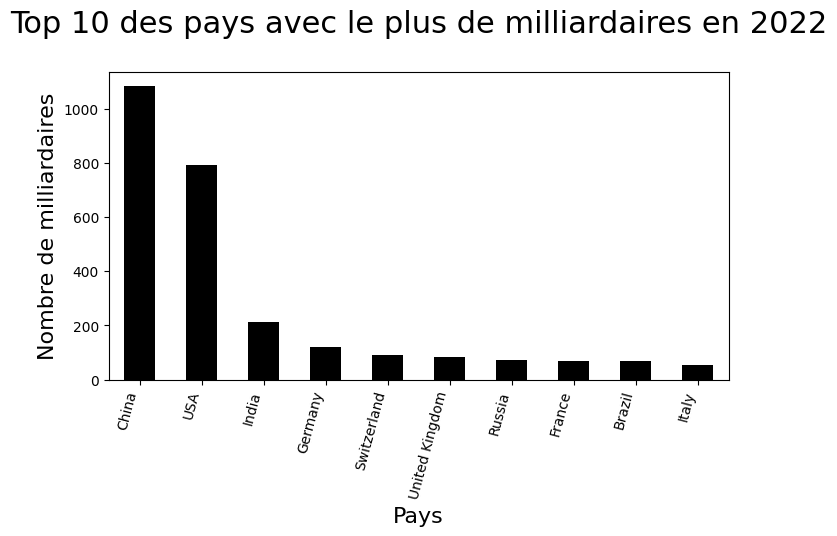

In [121]:
#Suite à un problème d'affichage:
#Suppression des espaces
#Suppression des doublons USA / UNITED STATES en remplaçant l'un par l'autre
data["permanent_country"] = data["permanent_country"].str.strip() 
data["permanent_country"].replace({"United States": "USA"}, inplace=True)

data_2022 = data[data["time"] == 2022]
ax = top_countries_2022 = data_2022["permanent_country"].value_counts().head(10)

#GRAPH
plt.figure(figsize=(8, 4))
ax = top_countries_2022.plot(kind="bar", color="black")
plt.title("Top 10 des pays avec le plus de milliardaires en 2022", size=22, y=1.1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
plt.xlabel("Pays", size=16)
plt.ylabel("Nombre de milliardaires", size=16)

plt.show()

#### **--> QUE PEUT-ON DIRE EN TERMES D'EVOLUTION ?**

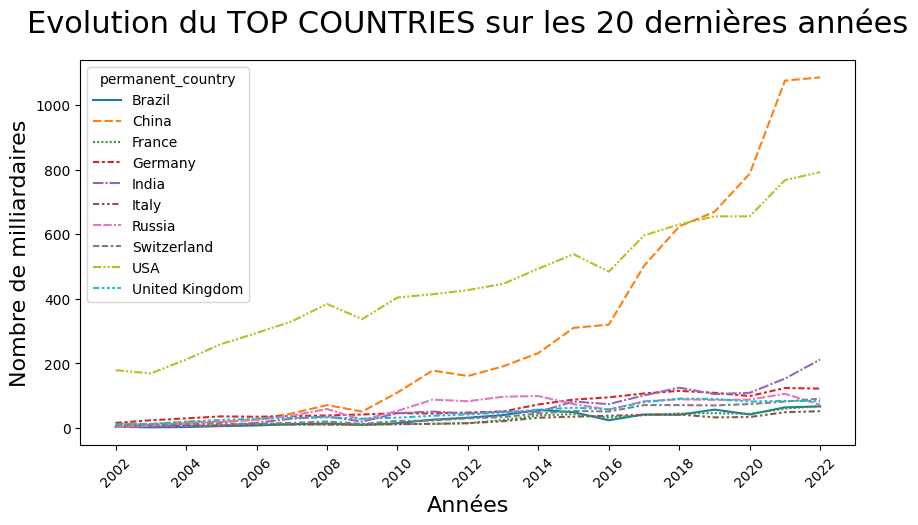

In [122]:
import matplotlib.ticker as ticker

# On effectue un loc afin de suivre l'évolution de 2002 à 2022 sur les pays "TOP 10"
to_plot = data.loc[data.permanent_country.isin(top_countries_2022.index),["time","permanent_country","name_cleaned"]]
to_plot = to_plot.pivot_table(index="time", values="name_cleaned", columns="permanent_country", aggfunc="count")

plt.figure(figsize=(10, 5))
sns.lineplot(data = to_plot)

plt.title("Evolution du TOP COUNTRIES sur les 20 dernières années", size=22, y=1.05)
plt.xlabel("Années", size=16)
plt.ylabel("Nombre de milliardaires", size = 16)

# Code pour formatter l'axe des abscisses
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation=45)

plt.show()

##### *On reprend ici le même graphique, sans les USA et la Chine, afin d'avoir plus de visibilité sur l'évolution des 8 autres pays*

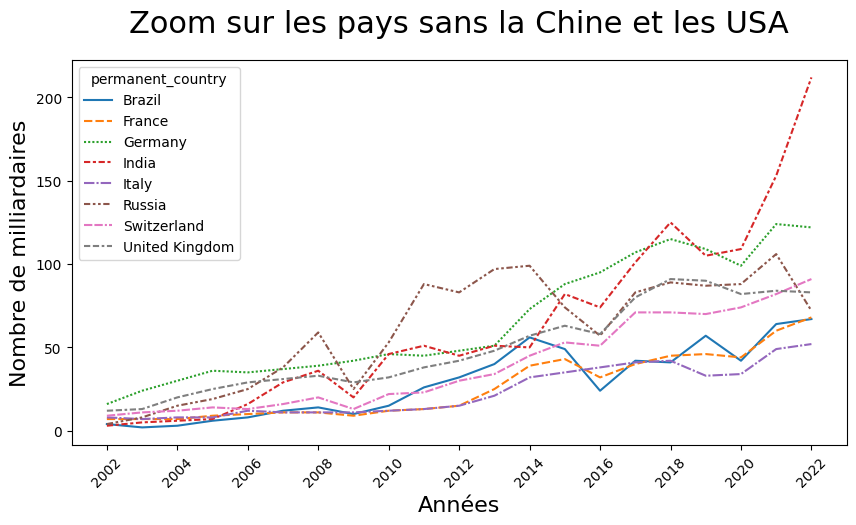

In [123]:
import matplotlib.ticker as ticker

to_plot = data.loc[data.permanent_country.isin(top_countries_2022.index[2:]),["time","permanent_country","name_cleaned"]]
to_plot = to_plot.pivot_table(index="time", values="name_cleaned", columns="permanent_country", aggfunc="count")

plt.figure(figsize=(10, 5))
sns.lineplot(data = to_plot)

plt.title("Zoom sur les pays sans la Chine et les USA", size=22, y=1.05)
plt.xlabel("Années", size=16)
plt.ylabel("Nombre de milliardaires", size = 16)

# Code pour formatter l'axe des abscisses
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation=45)

plt.show()

### ____ **LES PROPORTIONS HOMMES / FEMMES** ____

#### **--> COMMENT EVOLUE LA PROPORTION H/F AU FIL DES ANNEES?**

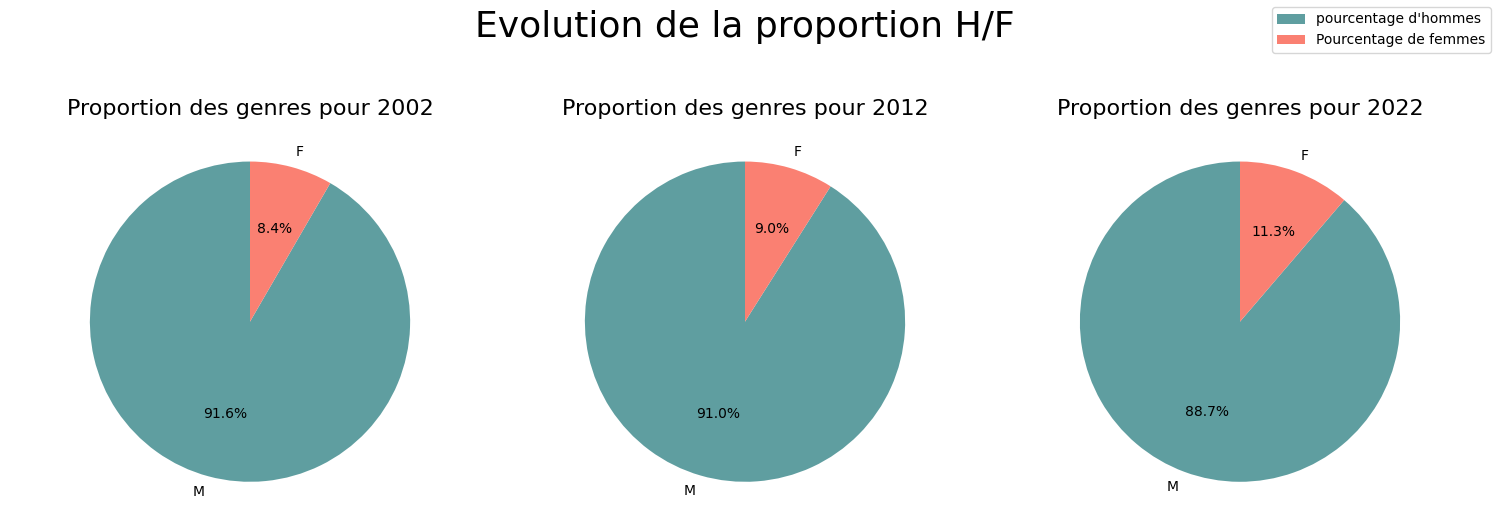

In [124]:
years = [2002, 2012, 2022]
colors = ["cadetblue", "salmon"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# On effectue une boucle afin d'obtenir un graphique pour les 3 années 
for i, year in enumerate(years):
    
    data_filtered = data.loc[data["time"] == year]
    data_filtered = data_filtered[data_filtered["gender"].isin(["F", "M"])]

    proportions = data_filtered["gender"].value_counts(normalize=True)

    axes[i].pie(proportions, labels=proportions.index, autopct="%1.1f%%", startangle=90, colors=colors)
    axes[i].axis("equal")
    axes[i].set_title(f"Proportion des genres pour {year}", size=16)

fig.suptitle("Evolution de la proportion H/F", fontsize=26, y=1.05)
fig.legend(["pourcentage d'hommes", "Pourcentage de femmes"], loc="upper right")

plt.tight_layout()
plt.show()

In [125]:
grouped_data = data_years.groupby(["time", "gender"]).size().unstack()
grouped_data

gender,F,M,M;F
time,,,
2002,28.0,307.0,NaN
2003,29.0,304.0,NaN
2004,42.0,389.0,NaN
2005,52.0,475.0,NaN
2006,60.0,562.0,NaN
2007,67.0,686.0,NaN
2008,78.0,823.0,NaN
2009,68.0,663.0,NaN
2010,90.0,912.0,NaN


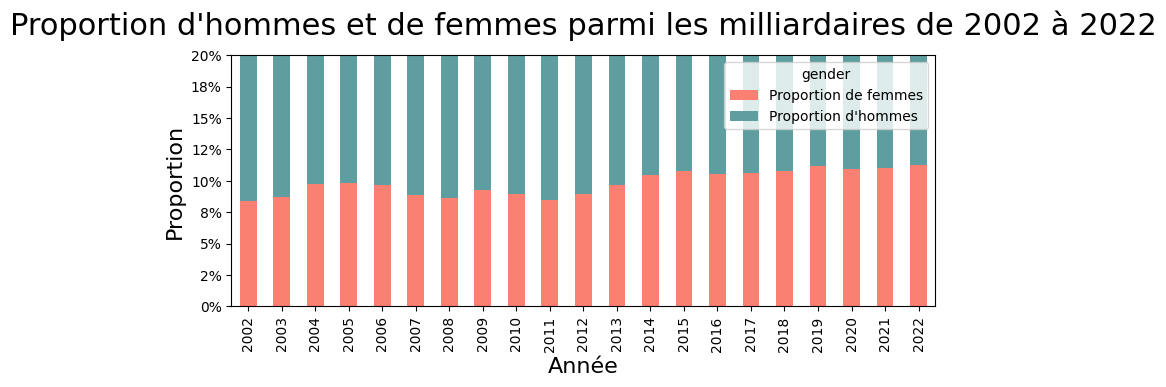

In [130]:

import matplotlib.ticker as mtick

#Attention, ne pas oublier la condition pour exclure les inputs "M;F" sinon le graphique est faux
data_years = data[(data["time"] >= 2002) & (data["time"] <= 2022) & (data["gender"] != "M;F")]
grouped_data = data_years.groupby(["time", "gender"]).size().unstack()

grouped_data["Total"] = grouped_data.sum(axis=1)
grouped_data["Proportion de femmes"] = grouped_data["F"] / grouped_data["Total"]
grouped_data["Proportion d'hommes"] = grouped_data["M"] / grouped_data["Total"]

ax = grouped_data[["Proportion de femmes", "Proportion d'hommes"]].sort_index()\
    .plot(kind="bar", stacked=True, figsize=(8, 4), color=["salmon", "cadetblue"])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.title("Proportion d\'hommes et de femmes parmi les milliardaires de 2002 à 2022", size=22, y=1.05)
plt.xlabel("Année", size=16)
plt.ylabel("Proportion", size=16)
plt.ylim((0, 0.2))

plt.tight_layout()
plt.show()